In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sklearn
from sklearn.neighbors import NearestNeighbors
import bigfloat
from decimal import *
import methods

In [2]:
# Parameters
T=4000 #sequence size
sigma=10
beta=8/3
rho=28
dt=0.01

x=np.zeros((T+1))
y=np.zeros((T+1))
z=np.zeros((T+1))
x[0]=0.2*(np.random.rand()-0.5)
y[0]=0.2*(np.random.rand()-0.5)
z[0]=0.2*(np.random.rand()-0.5)

for i in range(T):
    x[i+1]=x[i]+dt*sigma*(y[i]-x[i])
    y[i+1]=y[i]+dt*(x[i]*(rho-z[i])-y[i])
    z[i+1]=z[i]+dt*(x[i]*y[i]-beta*z[i])

In [3]:
def build_shadow_selfpred (X,tau,E,T,tpred):
    '''Build the shadow manifold of the time series signal X, with E variables and sampling tau and the shadow manifold of the time series signal X+tpred to perform self prediction'''
    shadow_X=np.zeros((T-E+1-tpred,E))
    for i in range((tau*E-1),T-tpred):
        sample=np.zeros((E))
        for j in range(0,E):
            sample[j]=X[i-j*tau]
        shadow_X[i-(tau*E-1),:]=sample
    
    shadow_Xpred=np.zeros((T-E+1-tpred,E))
    for i in range((tau*E+tpred-1),T):
        sample=np.zeros((E))
        for j in range(0,E):
            sample[j]=X[i-j*tau]
        shadow_Xpred[i-(tau*E-1)-tpred,:]=sample
    
    return shadow_X,shadow_Xpred

In [4]:
shadow_X,shadow_Xpred=build_shadow_selfpred(x,1,3,len(x),1)

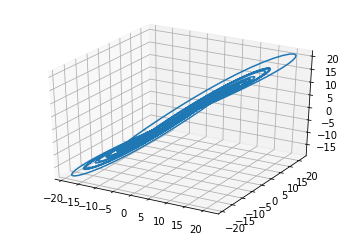

In [5]:
fig2=plt.figure()
ax2=fig2.add_subplot(111,projection='3d')
ax2.plot(shadow_Xpred[:,0],shadow_Xpred[:,1],shadow_Xpred[:,2])

In [8]:
def example(X,T,tau,E,L,emsemble,tpred):
    rhox=np.zeros((len(L),emsemble))
    rhoy=np.zeros((len(L),emsemble))
    for i in range(len(L)):
        for j in range (emsemble):
            y_pred, y_target, x_pred, x_target = methods.compute_xmap_selfpred(X,T,E,tau,L[i],tpred)
            rhox[i,j]=methods.compute_corr(y_pred,y_target)
            rhoy[i,j]=methods.compute_corr(x_pred,x_target)
    rhox=np.mean(rhox,1)
    rhoy=np.mean(rhoy,1)
    return rhox,rhoy,L

In [9]:
E=3
tau=1
T=4000
L=[5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
emsemble=50
tpred=2

rhox, rhoy, L=example(x,T,tau,E,L,emsemble,tpred)

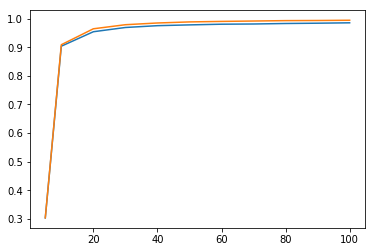

In [10]:
fig2=plt.figure()
ax2=fig2.add_subplot(111)
ax2.plot(L,rhox)
ax2.plot(L,rhoy)

## Test how tpred influences prediction

In [3]:
def example(X,T,tau,E,L,emsemble,tpred):
    rhox=np.zeros((len(L),len(tpred),emsemble))
    rhoy=np.zeros((len(L),len(tpred),emsemble))
    for i in range(len(L)):
        for k in range(len(tpred)):
            for j in range (emsemble):
                y_pred, y_target, x_pred, x_target = methods.compute_xmap_selfpred(X,T,E,tau,L[i],tpred[k])
                rhox[i,k,j]=methods.compute_corr(y_pred,y_target)
                rhoy[i,k,j]=methods.compute_corr(x_pred,x_target)
    rhox=np.mean(rhox,2)
    rhoy=np.mean(rhoy,2)
    return rhox,rhoy,L

In [4]:
E=3
tau=1
T=4000
L=[5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
emsemble=50
tpred=[1, 2, 5, 6, 8,10,15]

rhox, rhoy, L=example(x,T,tau,E,L,emsemble,tpred)